# Impact of Covid-19 Lockdown on Employment: Analyzing Unemployment Trends in India

---

### Objectives
- Primary Goal: Analyze the effects of the Covid-19 lockdown on employment opportunities in various states of India, focusing on trends in unemployment rates, employment rates, and labor participation.
- Secondary Goal: Predict how far the unemployment rate may rise and identify key factors influencing these rates during and after the lockdown.

---

### Dataset Objects
- Region: States of India where unemployment and employment rates are measured.
- Date: The specific date on which the unemployment rate was observed.
- Frequency: The frequency at which the data was recorded (Monthly in this case).
- Estimated Unemployment Rate (%): The percentage of unemployed people in each state.
- Estimated Employed (%): The percentage of employed people in each state.
- Estimated Labour Participation Rate (%): The percentage of people eligible and actively participating in the labor force.
- Labour Force: The group of people eligible for and capable of participating in employment.

---

### Questions to Explore
- How did the Covid-19 lockdown influence employment across different regions?
- What are the trends in the unemployment rate over time?
- What are the correlations between employment, unemployment, and labor participation rates during the lockdown?
- Can the unemployment rate be predicted to increase or decrease in the future based on current trends?

--- 

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

### Installing Required Libraries

In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

### Load the dataset

In [3]:
try:
    url = 'Unemployment_Rate_upto_11_2020.xlsx'
    df=pd.read_excel(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Employed Rate (%),Estimated Labour Participation Rate (%),Direction,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,-183.7696,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,-197.5470,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,-187.6722,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,-645.7810,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,-599.0378,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,-254.0531,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,-269.1711,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,-658.5476,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,-398.5455,47.73,East,22.9868,87.855


### Display initial information 

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Employed Rate (%)',
       ' Estimated Labour Participation Rate (%)', 'Direction', 'longitude',
       'latitude'],
      dtype='object')

In [5]:
# Strip Whitespace: Remove any leading or trailing spaces in the column name
df.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
# Convert 'Date' column to datetime
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_10132\4000080959.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Sort data by date
df = df.sort_values('Date')

In [8]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Employed Rate (%)',
       'Estimated Labour Participation Rate (%)', 'Direction', 'longitude',
       'latitude'],
      dtype='object')

In [9]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Employed Rate (%),Estimated Labour Participation Rate (%),Direction,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,-183.7696,41.02,South,15.9129,79.7400
227,Tripura,2020-01-31,M,32.67,1508130,-2207.0823,69.69,Northeast,23.9408,91.9882
40,Delhi,2020-01-31,M,22.23,5805284,-1014.5817,47.79,North,28.7041,77.1025
217,Telangana,2020-01-31,M,5.49,17609295,-266.0325,59.25,South,18.1124,79.0193
207,Tamil Nadu,2020-01-31,M,1.57,26881641,-23.9172,41.96,South,11.1271,78.6569


In [10]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Employed Rate (%),Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,-462.163247,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,-2941.605000,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,-602.377800,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,-344.100000,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,-162.846600,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,21.565000,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,453.212418,7.845419,6.270731,5.831738


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Employed Rate (%)              267 non-null    float64       
 6   Estimated Labour Participation Rate (%)  267 non-null    float64       
 7   Direction                                267 non-null    object        
 8   longitude                                267 non-null    float64       
 9   latitude                                 267 non

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### 1- Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [12]:
# Find duplicated Raws
print(df.duplicated().sum())

0


In [13]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Employed Rate (%)                0
Estimated Labour Participation Rate (%)    0
Direction                                  0
longitude                                  0
latitude                                   0
dtype: int64

In [14]:
# Find the missing data 
Missing_values = df.isnull()
for column in Missing_values.columns.values.tolist():
    print(column)
    print(Missing_values[column].value_counts())
    print("")

Region
Region
False    267
Name: count, dtype: int64

Date
Date
False    267
Name: count, dtype: int64

Frequency
Frequency
False    267
Name: count, dtype: int64

Estimated Unemployment Rate (%)
Estimated Unemployment Rate (%)
False    267
Name: count, dtype: int64

Estimated Employed
Estimated Employed
False    267
Name: count, dtype: int64

Estimated Employed Rate (%)
Estimated Employed Rate (%)
False    267
Name: count, dtype: int64

Estimated Labour Participation Rate (%)
Estimated Labour Participation Rate (%)
False    267
Name: count, dtype: int64

Direction
Direction
False    267
Name: count, dtype: int64

longitude
longitude
False    267
Name: count, dtype: int64

latitude
latitude
False    267
Name: count, dtype: int64



## Analyzing the Impact of Covid-19 on Unemployment Trends.

### Plot Unemployment Rate Over Time.

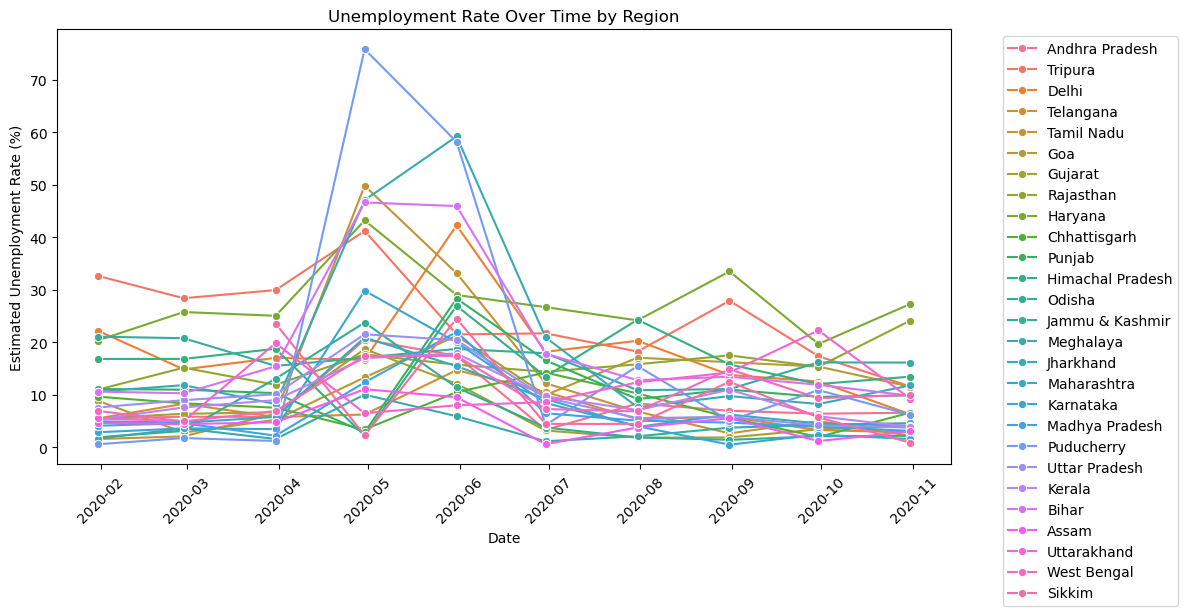

In [15]:
# Plot Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker="o")
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze how employment rates have changed over time during the Covid-19 pandemic.

### Plotting the Estimated Employed over time.

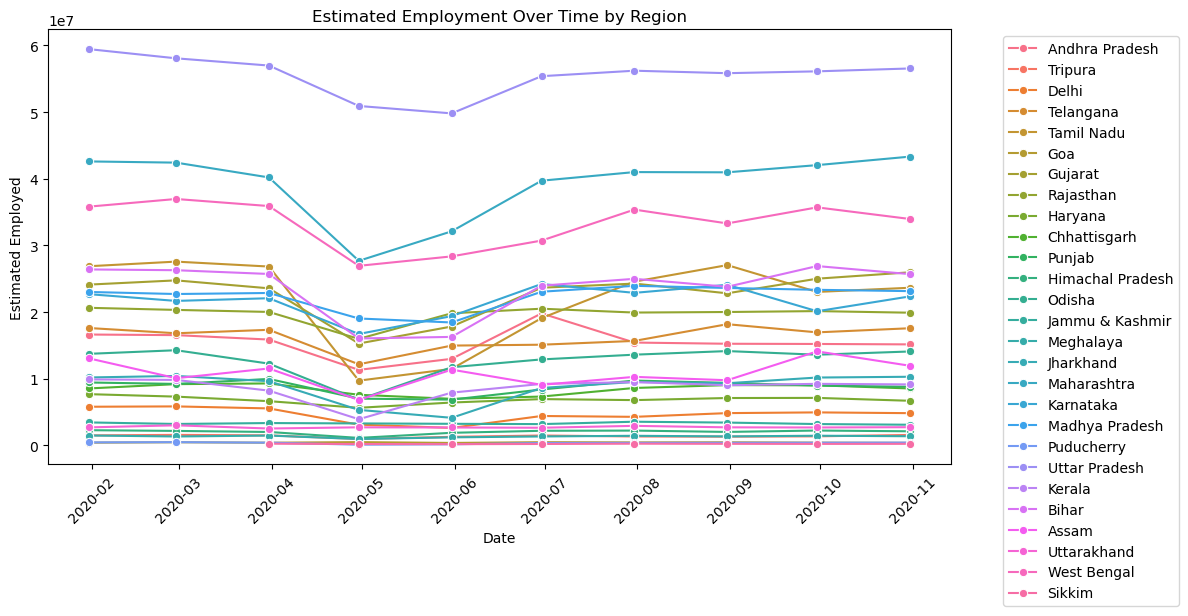

In [17]:
# Plotting the Estimated Employed over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Employed', hue='Region', marker="o",  data=df)
plt.title('Estimated Employment Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyze how Labour Participation Rate changed over time during the Covid-19 pandemic.

### Visualizing Labour Participation Rate over time

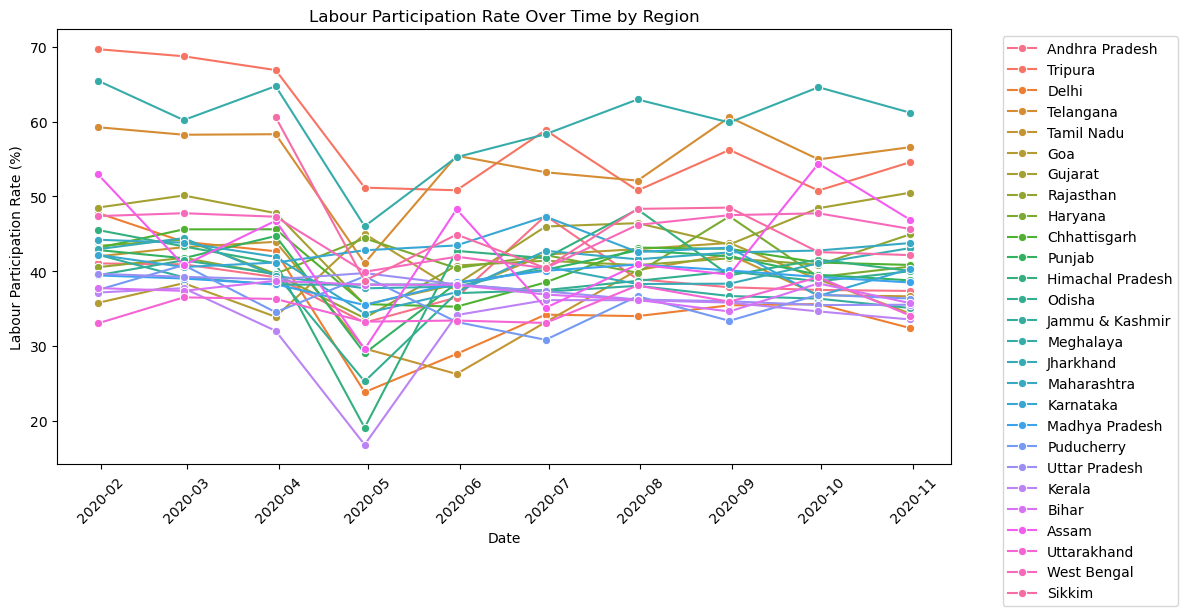

In [18]:
# Visualizing Labour Participation Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Labour Participation Rate (%)', hue='Region', marker="o", data=df)
plt.title('Labour Participation Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---

## Compare Unemployment Rates Pre- and Post-Covid-19

In [19]:
# Define pre-Covid and post-Covid dates
pre_covid_end = '2020-02-01'
post_covid_start = '2020-03-01'

# Split data into pre-Covid and post-Covid periods
pre_covid_data = df[df['Date'] < pre_covid_end]
post_covid_data = df[df['Date'] >= post_covid_start]

# Calculate average employment rates for both periods
pre_covid_avg = pre_covid_data['Estimated Unemployment Rate (%)'].mean()
post_covid_avg = post_covid_data['Estimated Unemployment Rate (%)'].mean()

print(f'Average Unemployment Rate Pre-Covid: {pre_covid_avg:.2f}%')
print(f'Average Unemployment Rate Post-Covid: {post_covid_avg:.2f}%')

Average Unemployment Rate Pre-Covid: 9.20%
Average Unemployment Rate Post-Covid: 12.96%


---

## Analyze Regional Differences

C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_10132\723615204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_unemployment.index, y=regional_unemployment.values, palette='viridis')


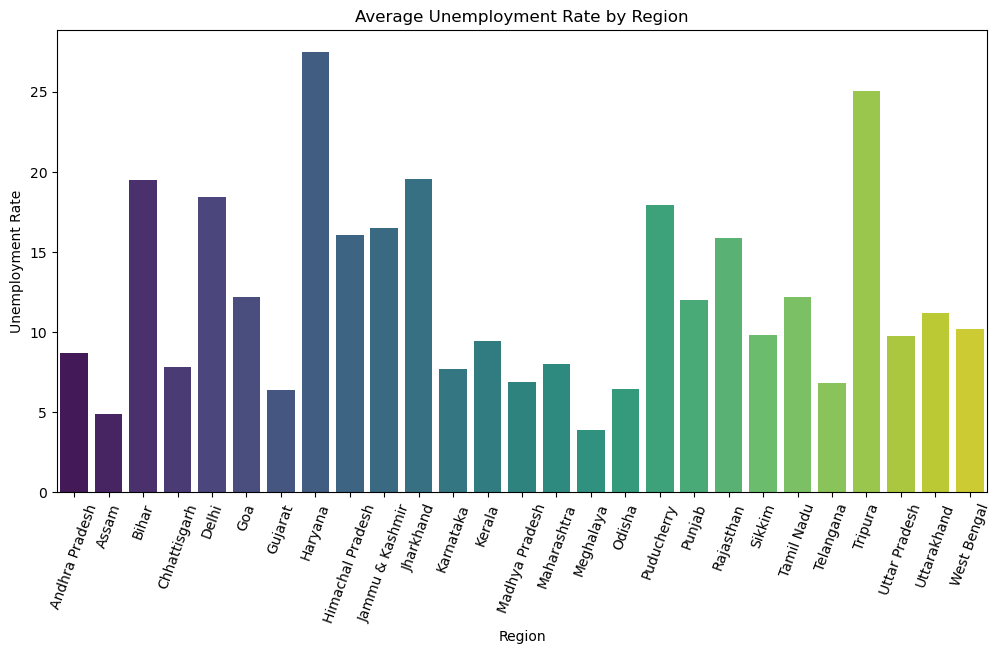

In [20]:
regional_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize = (12, 6))
sns.barplot(x=regional_unemployment.index, y=regional_unemployment.values, palette='viridis')
plt.xticks(rotation=70)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.show()

In [21]:
# Analyzing Unemployment Direction (Up or Down)
direction_counts = df['Direction'].value_counts()
print("\nUnemployment Direction Count:\n")
print(direction_counts)


Unemployment Direction Count:

Direction
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64


C:\Users\Mohamed Khater\AppData\Local\Temp\ipykernel_10132\3515427278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Direction',palette='viridis',  data=df)


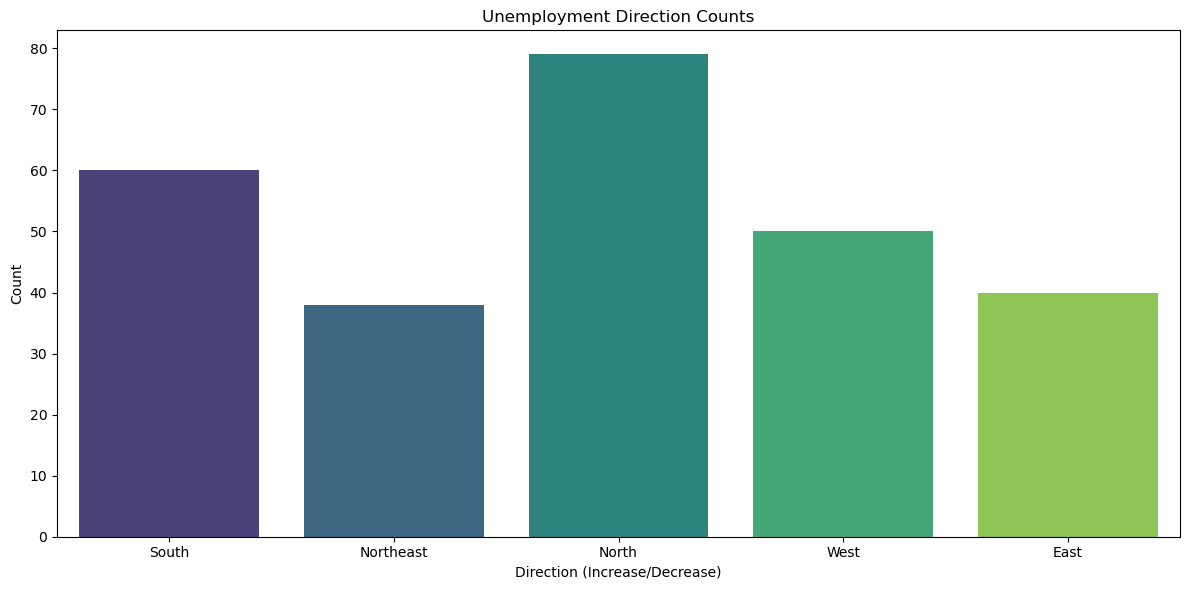

In [22]:
# Plot the unemployment direction (increase vs decrease)
plt.figure(figsize=(12, 6))
sns.countplot(x='Direction',palette='viridis',  data=df)
plt.title('Unemployment Direction Counts')
plt.xlabel('Direction (Increase/Decrease)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Clustered Geospatial Mapping of Global Unemployment Rates Using Folium.

In [23]:
# Ensure latitude and longitude are numeric
from folium.plugins import MarkerCluster
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Initialize the map
m = folium.Map(location=[21.39, 84.29], zoom_start=2)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster using the DataFrame with coordinates
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['Region']}: {row['Estimated Unemployment Rate (%)']} Unemployment",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Save and display the map
m.save('marker_cluster_map.html')
m

### Geospatial Visualization of Unemployment Rates Using Folium and Choropleth Maps.

In [24]:
from folium.plugins import MarkerCluster
# Ensure 'Estimated Unemployment Rate (%)' is numeric
df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'], errors='coerce')

# Group by 'Region' and calculate the average unemployment rate
regional_Unemployment = df.groupby(['Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()
regional_Unemployment = regional_Unemployment[['Region', 'Estimated Unemployment Rate (%)']]

# Load GeoJSON file for world countries
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Initialize the Folium map centered on a world view
m = folium.Map(location=[21.39, 84.29], zoom_start=2)

# Create a Choropleth map
folium.Choropleth(
    geo_data=world_geo,
    data=regional_Unemployment,
    columns=['Region', 'Estimated Unemployment Rate (%)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Estimated Unemployment Rate (%)'
).add_to(m)

# Display the map
m.save('choropleth_map.html')
m

---

## Forecasting Unemployment Rates Using Polynomial Regression and Time Series Analysis.

In [25]:
# Convert 'Date' column to datetime format and create 'Days' feature
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [26]:
# Define features (X) and target variable (y)
X = df[['Days']]
y = df['Estimated Unemployment Rate (%)']

In [27]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Polynomial Regression Mean Squared Error: 134.13
Polynomial Regression Mean Absolute Error: 9.40


C:\Users\Mohamed Khater\anaconda3\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


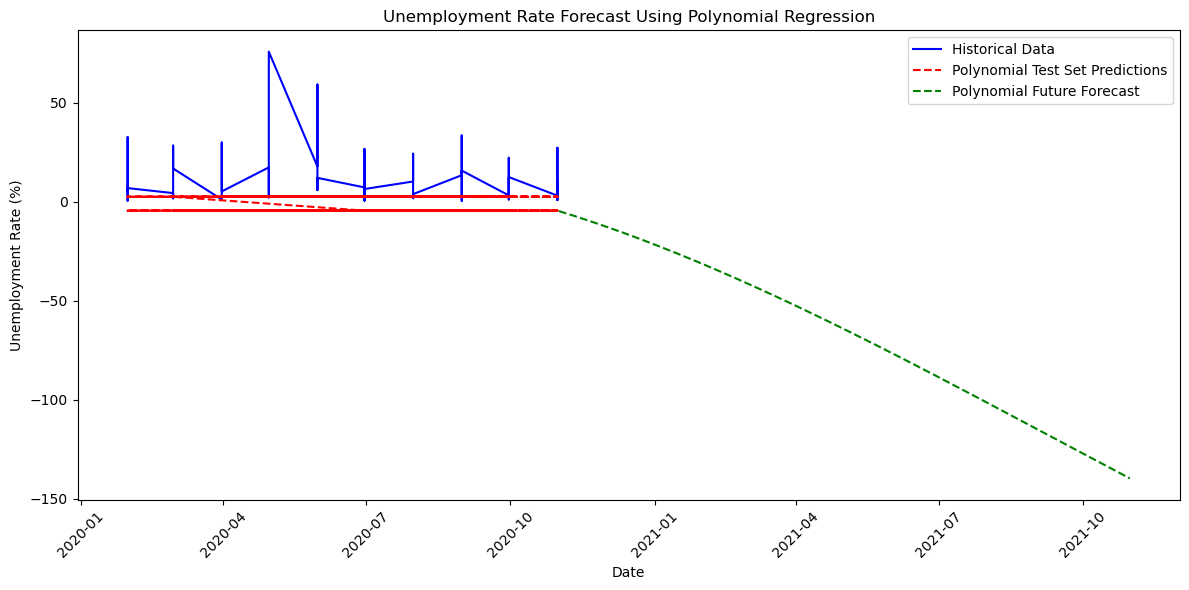

In [28]:
# Initialize polynomial features and model pipeline
poly = PolynomialFeatures(degree=3)
poly_model = make_pipeline(poly, LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression Mean Absolute Error: {mae_poly:.2f}")

# Forecast future unemployment rates
future_days_poly = np.arange(X['Days'].max() + 1, X['Days'].max() + 366).reshape(-1, 1)
future_dates = [df['Date'].max() + pd.Timedelta(days=i) for i in range(1, 366)]
future_predictions_poly = poly_model.predict(future_days_poly)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Historical Data', color='blue')
plt.plot(df['Date'].iloc[X_test.index], y_pred_poly, color='red', linestyle='--', label='Polynomial Test Set Predictions')
plt.plot(future_dates, future_predictions_poly, color='green', linestyle='--', label='Polynomial Future Forecast')
plt.title('Unemployment Rate Forecast Using Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Print the future unemployment rate predictions
print("\nFuture Unemployment Rate Predictions for the next year:")
for date, pred in zip(future_dates, future_predictions_poly):
    print(f"{date.date()}: {pred:.2f}%")


Future Unemployment Rate Predictions for the next year:
2020-11-01: -4.68%
2020-11-02: -4.92%
2020-11-03: -5.17%
2020-11-04: -5.42%
2020-11-05: -5.66%
2020-11-06: -5.91%
2020-11-07: -6.17%
2020-11-08: -6.42%
2020-11-09: -6.67%
2020-11-10: -6.92%
2020-11-11: -7.18%
2020-11-12: -7.44%
2020-11-13: -7.69%
2020-11-14: -7.95%
2020-11-15: -8.21%
2020-11-16: -8.47%
2020-11-17: -8.73%
2020-11-18: -9.00%
2020-11-19: -9.26%
2020-11-20: -9.53%
2020-11-21: -9.79%
2020-11-22: -10.06%
2020-11-23: -10.33%
2020-11-24: -10.60%
2020-11-25: -10.87%
2020-11-26: -11.14%
2020-11-27: -11.41%
2020-11-28: -11.69%
2020-11-29: -11.96%
2020-11-30: -12.24%
2020-12-01: -12.51%
2020-12-02: -12.79%
2020-12-03: -13.07%
2020-12-04: -13.35%
2020-12-05: -13.63%
2020-12-06: -13.91%
2020-12-07: -14.19%
2020-12-08: -14.48%
2020-12-09: -14.76%
2020-12-10: -15.05%
2020-12-11: -15.33%
2020-12-12: -15.62%
2020-12-13: -15.91%
2020-12-14: -16.20%
2020-12-15: -16.49%
2020-12-16: -16.78%
2020-12-17: -17.08%
2020-12-18: -17.37%
2020